In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Filtering & Sorting

## Import Data
Import the file, "dataUciOnlineRetail.xlsx", and save it in a variable called `df`. Then, do some initial checks of the data based on what we covered last class. *Note: because it's an excel file, the function you should use is `read_excel()`.*

What can you say about the data?

In [2]:
import pandas as pd
df = pd.read_excel("dataUciOnlineRetail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data Profiling

Take a look at the data types for the variables in the DataFrame and get summary statistics for the quantitative variables. Is there anything you can learn from the summary stats?

In [3]:
df.dtypes
df.describe()

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Are there missing values?

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

What countries are in the data?

In [5]:
df["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


Create a histogram of Quantity:

<Axes: ylabel='Frequency'>

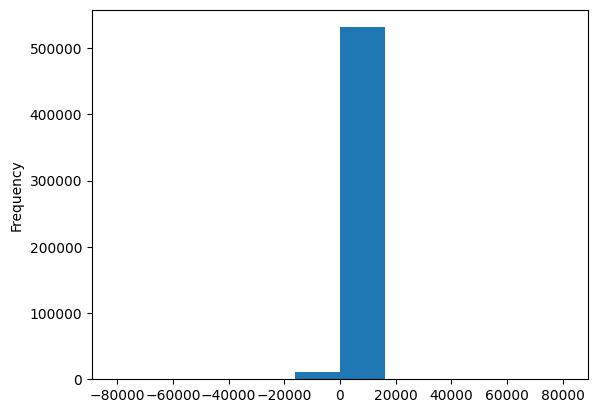

In [6]:
df["Quantity"].plot.hist()

Create a histogram of UnitPrice:

<Axes: ylabel='Frequency'>

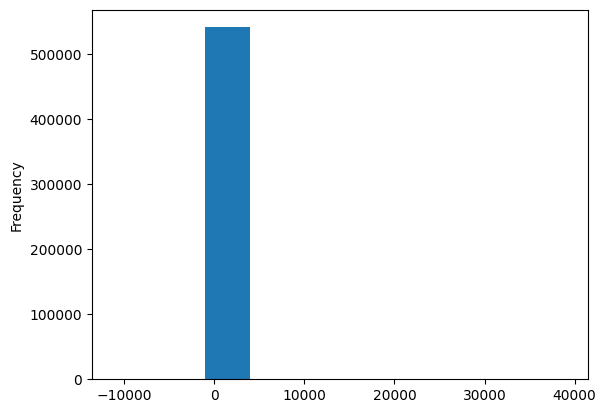

In [7]:
df["UnitPrice"].plot.hist()

Is there anything odd about the histograms? How useful are they?

## Selecting a Few Rows

Data can overwhelm. Let's look at just a few rows instead of all of them. We'll use `.loc[]` to filter our data set. The general structure of the `.loc[]` command is:
```
dataFrame.loc[rowCriteria, columnCriteria]
```
Let's start by looking at the row criteria. One way you can filter is to simply list the rows you want to see as `starting#:ending#`, like this (remember that Python starts numbering at 0):

In [8]:
df.loc[0:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Notice that, if you leave the column criteria empty, you will get all columns.

While you can use `.loc[]` to view specific row #'s, we usually want to filter our data based on logical criteria. For example, if I wanted to see only rows with orders from Austria:

In [9]:
df.loc[df["Country"] == "Austria"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
31464,C538971,22153,ANGEL DECORATION STARS ON DRESS,-48,2010-12-15 11:39:00,0.42,12865.0,Austria
34293,539330,37449,CERAMIC CAKE STAND + HANGING CAKES,8,2010-12-17 09:38:00,8.50,12370.0,Austria
34294,539330,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-17 09:38:00,1.45,12370.0,Austria
34295,539330,22962,JAM JAR WITH PINK LID,12,2010-12-17 09:38:00,0.85,12370.0,Austria
34296,539330,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,4,2010-12-17 09:38:00,4.25,12370.0,Austria
...,...,...,...,...,...,...,...,...
536964,581232,15056BL,EDWARDIAN PARASOL BLACK,24,2011-12-08 10:26:00,5.95,12358.0,Austria
536965,581232,15056P,EDWARDIAN PARASOL PINK,12,2011-12-08 10:26:00,5.95,12358.0,Austria
536966,581232,22059,CERAMIC STRAWBERRY DESIGN MUG,24,2011-12-08 10:26:00,0.39,12358.0,Austria
536967,581232,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,36,2011-12-08 10:26:00,0.39,12358.0,Austria


Now, you try...view only the rows where the Quantity is more than 100:

In [10]:
df.loc[df["Quantity"] > 100]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029.0,United Kingdom
...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,15694.0,United Kingdom
541286,581497,22355,CHARLOTTE BAG SUKI DESIGN,110,2011-12-09 10:23:00,2.46,NaN,United Kingdom
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,12985.0,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102.0,United Kingdom


If you have multiple filters that you'd like to combine, you can either use `&` or separate them out into multiple `.loc[]` commands. The following 2 lines of code do the same thing:

In [11]:
df.loc[(df["Quantity"] > 100) & (df["Country"] == "Austria")]
df.loc[df["Quantity"] > 100].loc[df["Country"] == "Austria"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
130480,547493,22582,PACK OF 6 SWEETIE GIFT BOXES,144,2011-03-23 12:06:00,2.10,12818.0,Austria
130481,547493,22584,PACK OF 6 PANNETONE GIFT BOXES,144,2011-03-23 12:06:00,2.10,12818.0,Austria
130483,547493,22546,MINI JIGSAW PURDEY,240,2011-03-23 12:06:00,0.36,12818.0,Austria
130484,547493,21918,SET 12 KIDS COLOUR CHALK STICKS,288,2011-03-23 12:06:00,0.36,12818.0,Austria


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
130480,547493,22582,PACK OF 6 SWEETIE GIFT BOXES,144,2011-03-23 12:06:00,2.10,12818.0,Austria
130481,547493,22584,PACK OF 6 PANNETONE GIFT BOXES,144,2011-03-23 12:06:00,2.10,12818.0,Austria
130483,547493,22546,MINI JIGSAW PURDEY,240,2011-03-23 12:06:00,0.36,12818.0,Austria
130484,547493,21918,SET 12 KIDS COLOUR CHALK STICKS,288,2011-03-23 12:06:00,0.36,12818.0,Austria


Notice that you need to use ()s to separate multiple logical statements if you are including them in a single `.loc[]` command.

If you want to combine 2 conditions with OR instead of AND, use `|` instead of `&`:

In [12]:
df.loc[(df["Quantity"] > 100) | (df["Country"] == "Austria")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,2010-12-01 09:58:00,1.45,16029.0,United Kingdom
...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,15694.0,United Kingdom
541286,581497,22355,CHARLOTTE BAG SUKI DESIGN,110,2011-12-09 10:23:00,2.46,NaN,United Kingdom
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,2011-12-09 10:46:00,0.19,12985.0,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102.0,United Kingdom


You try...show the rows where the Country is Belgium and the quantity is less than 3:

In [13]:
df.loc[(df["Country"] == "Belgium") & (df["Quantity"] < 3)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7280,537026,21217,RED RETROSPOT ROUND CAKE TINS,2,2010-12-03 16:35:00,9.95,12395.0,Belgium
7290,537026,POST,POSTAGE,2,2010-12-03 16:35:00,18.00,12395.0,Belgium
34469,539391,22770,MIRROR CORNICE,2,2010-12-17 11:51:00,14.95,12417.0,Belgium
34471,539391,POST,POSTAGE,2,2010-12-17 11:51:00,15.00,12417.0,Belgium
36291,539447,84906,PINK B'FLY C/COVER W BOBBLES,2,2010-12-17 16:00:00,5.95,12395.0,Belgium
...,...,...,...,...,...,...,...,...
531770,580965,23173,REGENCY TEAPOT ROSES,2,2011-12-06 14:52:00,9.95,12417.0,Belgium
531775,580965,22624,IVORY KITCHEN SCALES,2,2011-12-06 14:52:00,8.50,12417.0,Belgium
531905,580979,20749,ASSORTED COLOUR MINI CASES,2,2011-12-06 15:40:00,7.95,12362.0,Belgium
531906,580979,20750,RED RETROSPOT MINI CASES,2,2011-12-06 15:40:00,7.95,12362.0,Belgium


So far, we've returned all columns in our filtered commands. Now, let's use column criteria to select only a few columns. To do this, you just need to list the columns you'd like as the 2nd parameter in the `.loc[]` command:

In [14]:
df.loc[df["Quantity"] > 100, "Quantity"]
df.loc[df["Quantity"] > 100, ["Quantity", "UnitPrice"]]

96        120
178       192
179       192
180       192
181       432
         ... 
540442    120
541286    110
541545    180
541702    144
541711    144
Name: Quantity, Length: 4950, dtype: int64

,Quantity,UnitPrice
96,120,0.42
178,192,3.82
179,192,3.37
180,192,3.37
181,432,1.45
...,...,...
540442,120,3.39
541286,110,2.46
541545,180,0.19
541702,144,3.26


Modify your previous code to show the rows where the Country is Belgium and the quantity is less than 3, but only display the Country and Quantity columns:

In [15]:
df.loc[(df["Country"] == "Belgium") & (df["Quantity"] < 3), ["Country", "Quantity"]]

,Country,Quantity
7280,Belgium,2
7290,Belgium,2
34469,Belgium,2
34471,Belgium,2
36291,Belgium,2
...,...,...
531770,Belgium,2
531775,Belgium,2
531905,Belgium,2
531906,Belgium,2


## Combining for Statistics

Now that we can filter our data, we can investigate it and summarize it in detail. In the next code block, write code to get the summary statistics for the Quantity and UnitPrice columns only, filtering for sales in the United Kingdom:

In [16]:
df.loc[df["Country"] == "United Kingdom", ["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,495478.000000,495478.000000
mean,8.605486,4.532422
std,227.588756,99.315438
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,38970.000000


We can do the same thing with visualizations. Remember that this is the histogram for the Quantity column:

<Axes: ylabel='Frequency'>

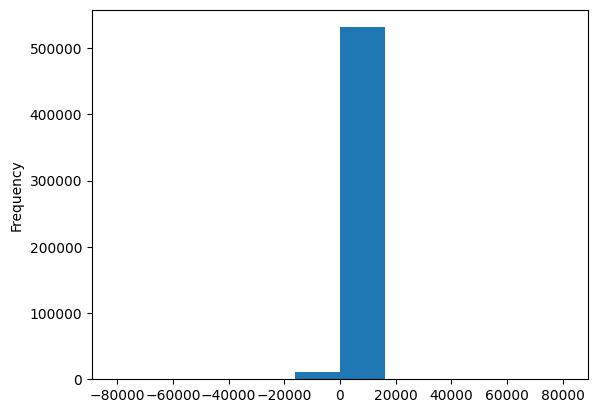

In [17]:
df["Quantity"].plot.hist()

Use the `.loc[]` command to display the histogram only for rows with a Quantity greater than 0 and less than 50:

<Axes: ylabel='Frequency'>

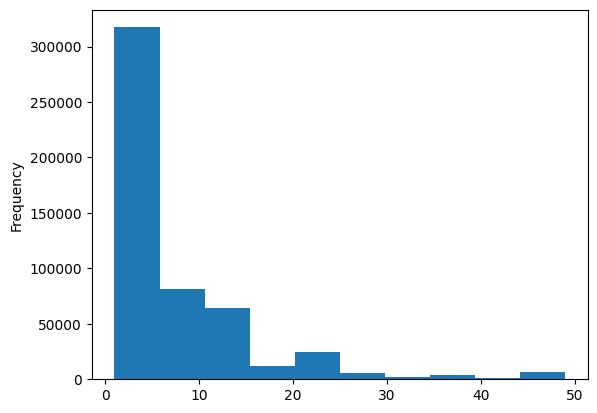

In [19]:
df.loc[(df["Quantity"] > 0) & (df["Quantity"] < 50), "Quantity"].plot.hist()

Why does this histogram look different from the original histogram of Quantity that we created up above? Which graph is more useful?

## Ordering

The `.sort_values()` method orders the results:

In [20]:
df.sort_values("UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,2010-12-21 15:40:00,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1,2011-01-11 09:14:00,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


The default is to sort in ascending order (low to high). If you want to switch to descending order (high to low), add the `ascending=False` parameter:

In [21]:
df.sort_values("UnitPrice", ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
128465,547337,85025C,barcode problem,-230,2011-03-22 11:47:00,0.00,NaN,United Kingdom
128464,547336,21689,wrong barcode,-323,2011-03-22 11:45:00,0.00,NaN,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.00,14911.0,EIRE
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


If you want to sort by multiple columns, you can just list them within `.sort_values()`. For example, if I first want to sort by InvoiceDate and then by UnitPrice, I would do this:

In [22]:
df.sort_values(["InvoiceDate", "UnitPrice"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Now you try...filter the data to show only rows where the Quantity is less than 50 and sort the results by Quantity in ascending order (you can display all columns):

In [23]:
df.loc[df["Quantity"] < 50].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
462433,575975,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,49,2011-11-13 13:18:00,0.29,13536.0,United Kingdom
67120,541827,22322,BIRD DECORATION GREEN POLKADOT,49,2011-01-21 17:05:00,0.79,NaN,United Kingdom
521624,580367,22197,POPCORN HOLDER,49,2011-12-02 16:39:00,0.85,NaN,United Kingdom
40948,539750,22110,BIRD HOUSE HOT WATER BOTTLE,49,2010-12-21 15:40:00,7.62,NaN,United Kingdom


## Practice

Show the InvoiceDate, Quantity, and UnitPrice for transactions from the United Kingdom where the StockCode is 84029G and order it by Quantity:

In [24]:
df.loc[(df["Country"] == "United Kingdom") & (df["StockCode"] == "84029G"), 
["InvoiceDate", "Quantity", "UnitPrice"]].sort_values("Quantity")

,InvoiceDate,Quantity,UnitPrice
387466,2011-10-10 11:54:00,-8,4.25
352811,2011-09-21 17:04:00,-3,3.75
455574,2011-11-10 13:35:00,-2,4.25
329642,2011-09-07 12:48:00,-1,4.25
203416,2011-05-24 15:58:00,1,7.46
...,...,...,...
49209,2011-01-09 11:20:00,72,3.39
25063,2010-12-10 15:17:00,82,8.47
437486,2011-11-03 15:47:00,108,3.75
41030,2010-12-21 15:40:00,129,8.47


Show the Country, StockCode, and Quantity for transactions from either Austria or Belgium where the UnitPrice is greater than 7 in descending order by Quantity:

In [25]:
df.loc[((df["Country"] == "Austria") | (df["Country"] == "Belgium")) & 
(df["UnitPrice"] > 7), ["Country", "StockCode", "Quantity"]].sort_values("Quantity", ascending = False)

,Country,StockCode,Quantity
332521,Belgium,POST,11
438832,Belgium,22423,10
479774,Belgium,20685,10
130493,Austria,POST,9
479784,Belgium,POST,8
...,...,...,...
47142,Belgium,22060,-1
456092,Belgium,23462,-1
445953,Belgium,POST,-1
507366,Belgium,22942,-2
